In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [3]:
data = pd.read_csv('monthly_agg_sales.csv')

In [4]:
data.head()

,Sales,month
0,4851.080,1/1/2014
1,1071.724,2/1/2014
2,8605.879,3/1/2014
3,11155.074,4/1/2014
4,7135.624,5/1/2014


In [5]:
# train test split 
train = data.head(42)
test = data.tail(6)

In [6]:
# Stationarity check
result = adfuller(train.Sales.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.288990
p-value: 0.000006


In [7]:
# Create time series objects
train.set_index('month',inplace = True)
test.set_index('month',inplace = True)

In [8]:
# create lag variables
train['lag1'] = train['Sales'].shift(1)

C:\Users\Suprith Shettigar\AppData\Local\Temp\ipykernel_7016\2103969379.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['lag1'] = train['Sales'].shift(1)


In [9]:
# check stationarty for lag
result = adfuller(train.lag1.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.238521
p-value: 0.000007


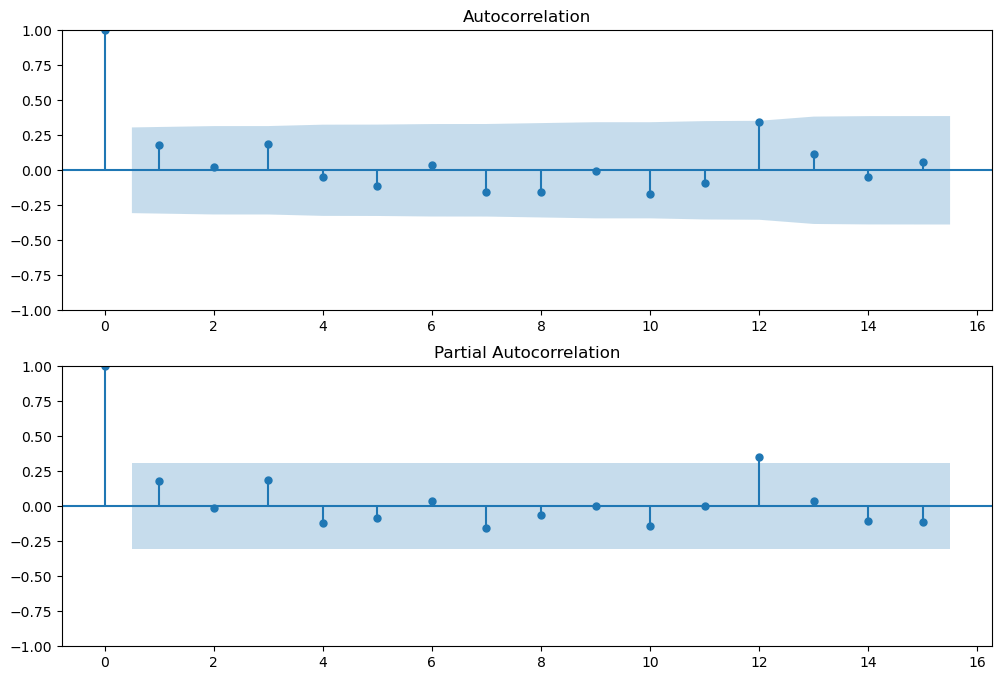

In [12]:
# Plot ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(train['lag1'].dropna(),lags=15,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(train['lag1'].dropna(),lags=15,ax=ax2)

In [13]:
# Fit the model
model = ARIMA(train.Sales, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -432.026
Date:                Wed, 10 Jan 2024   AIC                            872.052
Time:                        09:41:31   BIC                            879.002
Sample:                    01-01-2014   HQIC                           874.599
                         - 06-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.338e+04   1263.077     10.592      0.000    1.09e+04    1.59e+04
ar.L1         -0.3854      0.639     -0.603      0.546      -1.637       0.866
ma.L1          0.5766      0.524      1.101      0.2

C:\Users\Suprith Shettigar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Suprith Shettigar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Suprith Shettigar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
# make predictions
predictions = model_fit.forecast(6)

In [16]:
# Check accuracy
print(f'ARIMA Model Test Data MSE: {np.mean((predictions.values - test.Sales)**2):.3f}')
print(f'ARIMA Model Test Data MAPE: {np.mean(np.abs(test.Sales - predictions.values)/test.Sales )*100:.3f}')

ARIMA Model Test Data MSE: 225298011.182
ARIMA Model Test Data MAPE: 51.040
